<a href="https://colab.research.google.com/github/onlyreynaldo/python-clustering-data/blob/main/Cluster_Herarquico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cluster Hierárquico**

In [1]:
pasta_raiz = 'drive/My Drive/datasets'

import numpy as np
import pandas as pd

In [2]:
mcdonalds = pd.read_csv(f"{pasta_raiz}/mcdonalds_small.csv", sep=';', decimal=',')
mcdonalds.head()

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0
4,Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.0


In [3]:
mcdonalds.describe()

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,493.760000,41.360000,27.560000,24.164000,8.852000,0.596000,61.200000,3.75600,1154.760000,151.160000,4.291600
std,171.298054,9.317904,11.550902,12.528064,6.484798,0.538888,35.433035,1.74716,363.220236,81.943415,2.915837
min,257.000000,29.000000,13.000000,7.800000,0.800000,0.100000,11.000000,1.10000,542.000000,37.000000,0.770000
25%,372.000000,33.000000,18.000000,16.000000,4.400000,0.200000,33.000000,2.20000,888.000000,70.000000,2.500000
50%,454.000000,40.000000,27.000000,20.000000,7.000000,0.400000,54.000000,3.50000,1072.000000,165.000000,3.800000
75%,558.000000,46.000000,34.000000,30.000000,12.000000,0.700000,83.000000,5.10000,1361.000000,193.000000,4.400000
max,863.000000,57.000000,54.000000,55.000000,24.000000,1.700000,145.000000,6.70000,1917.000000,381.000000,11.000000


In [4]:
X = mcdonalds.drop(['Lanche'], axis=1)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns.tolist())

In [6]:
X.describe()

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.390693,0.441429,0.355122,0.346695,0.347069,0.310000,0.374627,0.474286,0.445644,0.331860,0.344242
std,0.282670,0.332782,0.281729,0.265425,0.279517,0.336805,0.264426,0.311993,0.264160,0.238208,0.285028
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.189769,0.142857,0.121951,0.173729,0.155172,0.062500,0.164179,0.196429,0.251636,0.095930,0.169110
50%,0.325083,0.392857,0.341463,0.258475,0.267241,0.187500,0.320896,0.428571,0.385455,0.372093,0.296188
75%,0.496700,0.607143,0.512195,0.470339,0.482759,0.375000,0.537313,0.714286,0.595636,0.453488,0.354839
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
!pip install yellowbrick==1.2

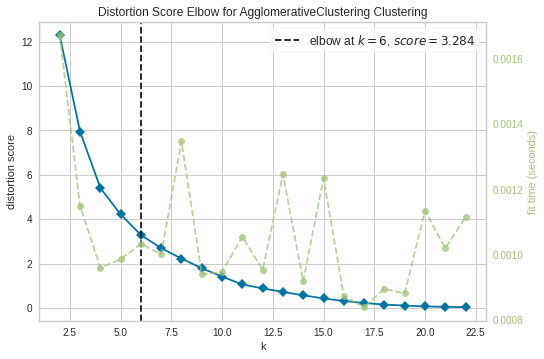

In [15]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,23))
visualizer.fit(X)
visualizer.show();

In [17]:
model = AgglomerativeClustering(n_clusters=6)
model.fit(X)
X['cluster_id'] = model.labels_

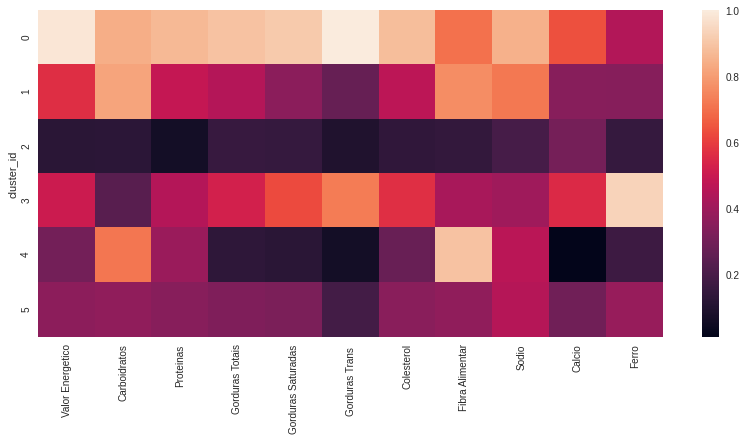

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,6))

sns.heatmap(X.groupby('cluster_id').mean(), ax=ax);

In [29]:
X.assign(lanche=mcdonalds.Lanche).query("cluster_id == 2")

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster_id,lanche
5,0.191419,0.321429,0.121951,0.173729,0.215517,0.1875,0.238806,0.196429,0.168000,0.380814,0.296188,2,McFish
7,0.132013,0.142857,0.000000,0.194915,0.159483,0.1875,0.000000,0.392857,0.066182,0.061047,0.227761,2,McChicken Jr
14,0.087459,0.107143,0.048780,0.131356,0.267241,0.1875,0.149254,0.142857,0.173818,0.316860,0.335288,2,Cheeseburger
15,0.000000,0.071429,0.000000,0.031780,0.142241,0.1250,0.082090,0.142857,0.000000,0.095930,0.335288,2,Hamburger
16,0.136964,0.000000,0.146341,0.173729,0.112069,0.0000,0.231343,0.017857,0.251636,0.401163,0.005865,2,Wrap Grill Maionese
17,0.189769,0.142857,0.024390,0.258475,0.163793,0.0625,0.104478,0.125000,0.356364,0.392442,0.003910,2,Wrap Crispy Maionese
18,0.080858,0.035714,0.146341,0.088983,0.056034,0.0000,0.201493,0.000000,0.208727,0.401163,0.000978,2,Wrap Grill Lemon
19,0.133663,0.178571,0.024390,0.173729,0.107759,0.0000,0.074627,0.125000,0.314182,0.392442,0.000000,2,Wrap Crispy Lemon


In [30]:
X.query("cluster_id == 0")

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster_id
1,0.966997,0.571429,0.682927,1.000000,1.00000,1.0,0.694030,0.714286,0.704727,1.000000,0.726295,0
22,0.996700,1.000000,1.000000,0.809322,0.87069,1.0,1.000000,0.696429,1.000000,0.453488,0.315738,0
23,1.000000,0.964286,0.926829,0.872881,0.87069,1.0,0.955224,0.696429,0.853818,0.465116,0.296188,0


In [31]:
X.query('cluster_id == 3')

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster_id
2,0.496700,0.250000,0.439024,0.512712,0.655172,0.7500,0.559701,0.446429,0.490182,0.69186,0.902248,3
3,0.607261,0.321429,0.512195,0.618644,0.655172,0.7500,0.626866,0.500000,0.518545,0.50000,1.000000,3
4,0.412541,0.142857,0.390244,0.449153,0.568966,0.6875,0.522388,0.321429,0.201455,0.47093,0.902248,3


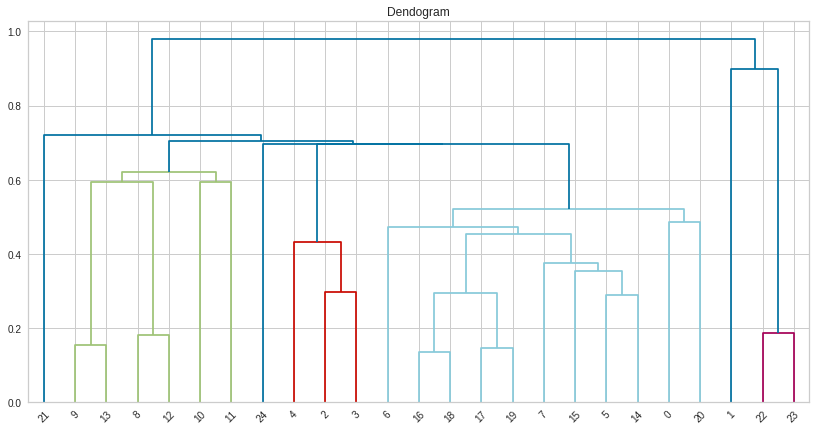

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14,7))
plt.title('Dendogram')

dend = shc.dendrogram(shc.linkage(X.drop('cluster_id', axis=1)))

In [22]:
X.head()

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster_id
0,0.407591,0.428571,0.292683,0.406780,0.482759,0.2500,0.320896,0.428571,0.304000,0.363372,0.560117,5
1,0.966997,0.571429,0.682927,1.000000,1.000000,1.0000,0.694030,0.714286,0.704727,1.000000,0.726295,0
2,0.496700,0.250000,0.439024,0.512712,0.655172,0.7500,0.559701,0.446429,0.490182,0.691860,0.902248,3
3,0.607261,0.321429,0.512195,0.618644,0.655172,0.7500,0.626866,0.500000,0.518545,0.500000,1.000000,3
4,0.412541,0.142857,0.390244,0.449153,0.568966,0.6875,0.522388,0.321429,0.201455,0.470930,0.902248,3


In [23]:
mcdonalds.head()

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0
4,Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.0


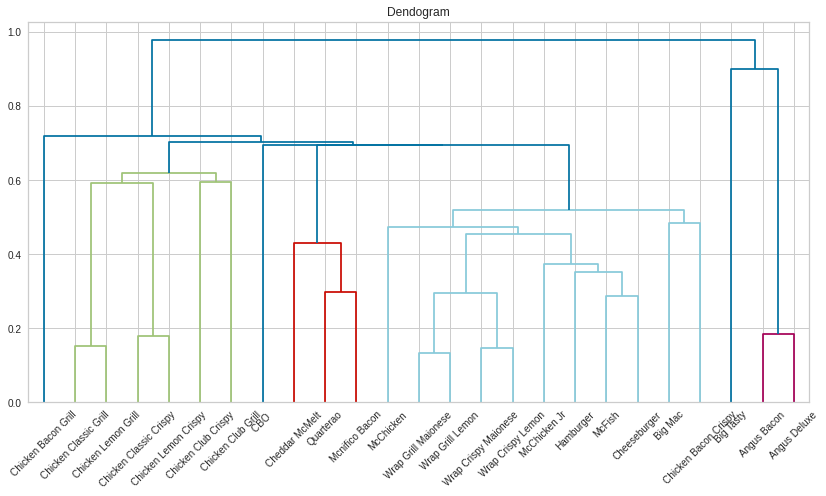

In [28]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(14,7))
plt.title('Dendogram')

dend = shc.dendrogram(shc.linkage(X.drop('cluster_id', axis=1)), labels=mcdonalds['Lanche'].values)

In [25]:
mcdonalds.Lanche.values

array(['Big Mac', 'Big Tasty', 'Quarterao', 'Mcnifico Bacon',
       'Cheddar McMelt', 'McFish', 'McChicken', 'McChicken Jr',
       'Chicken Classic Crispy', 'Chicken Classic Grill',
       'Chicken Club Crispy', 'Chicken Club Grill',
       'Chicken Lemon Crispy', 'Chicken Lemon Grill', 'Cheeseburger',
       'Hamburger', 'Wrap Grill Maionese', 'Wrap Crispy Maionese',
       'Wrap Grill Lemon', 'Wrap Crispy Lemon', 'Chicken Bacon Crispy',
       'Chicken Bacon Grill', 'Angus Bacon', 'Angus Deluxe', 'CBO '],
      dtype=object)

In [27]:
mcdonalds.Lanche.values.tolist()

['Big Mac',
 'Big Tasty',
 'Quarterao',
 'Mcnifico Bacon',
 'Cheddar McMelt',
 'McFish',
 'McChicken',
 'McChicken Jr',
 'Chicken Classic Crispy',
 'Chicken Classic Grill',
 'Chicken Club Crispy',
 'Chicken Club Grill',
 'Chicken Lemon Crispy',
 'Chicken Lemon Grill',
 'Cheeseburger',
 'Hamburger',
 'Wrap Grill Maionese',
 'Wrap Crispy Maionese',
 'Wrap Grill Lemon',
 'Wrap Crispy Lemon',
 'Chicken Bacon Crispy',
 'Chicken Bacon Grill',
 'Angus Bacon',
 'Angus Deluxe',
 'CBO ']

In [ ]:
## Para restabler nuestro X
X = X.reset_index().drop('Lanche', axis=1)
